# 基于“生态位”思想网络节点拆解

无向加权图的网络拆解与网络韧性的关系


既考虑个体的“局部属性”，也考虑它在系统整体结构中的相对位置与作用。
单层网络：
    Local_role(v):加权度
    global_influence(v):介数中心性
    uniqueness(v):结构差异熵（类比到系统中的一种功能性独特物种）
    我们从简单的ER网络出发，给出一个ER网络其边权重由空间嵌入，然后给出加权度攻击、介数中心性攻击和生态位攻击的不同表现。

## 空间嵌入ER网络的三种攻击对比

In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

In [3]:
# 1. 生成空间嵌入 ER 网络
def generate_spatial_er_graph(n, p, space_size=100):
    G = nx.erdos_renyi_graph(n, p)
    pos = {i: np.random.rand(2) * space_size for i in G.nodes()}
    nx.set_node_attributes(G, pos, "pos")
    for u, v in G.edges():
        dist = np.linalg.norm(pos[u] - pos[v])
        G[u][v]['weight'] = dist
    return G

In [4]:
# 2. 加权度攻击
def weighted_degree_attack(G):
    G = deepcopy(G)
    result = []
    while G.number_of_nodes() > 0:
        wdeg = {v: sum(data['weight'] for _, _, data in G.edges(v, data=True)) for v in G.nodes()}
        target = max(wdeg, key=wdeg.get)
        G.remove_node(target)
        giant = len(max(nx.connected_components(G), key=len)) if G.number_of_nodes() > 0 else 0
        result.append(giant)
    return result

In [5]:
# 3. 介数攻击
def betweenness_attack(G):
    G = deepcopy(G)
    result = []
    while G.number_of_nodes() > 0:
        bc = nx.betweenness_centrality(G, weight='weight')
        target = max(bc, key=bc.get)
        G.remove_node(target)
        giant = len(max(nx.connected_components(G), key=len)) if G.number_of_nodes() > 0 else 0
        result.append(giant)
    return result

In [6]:
# 4. 生态位指标 + 攻击
def ecological_niche_index(G, alpha=0.4, beta=0.4, gamma=0.2):
    deg = {v: sum(data['weight'] for _, _, data in G.edges(v, data=True)) for v in G.nodes()}
    betw = nx.betweenness_centrality(G, weight='weight')
    scores = {}
    for v in G.nodes():
        neigh = set(G.neighbors(v))
        overlap = []
        for u in neigh:
            nu = set(G.neighbors(u))
            union = neigh | nu
            inter = neigh & nu
            if len(union) > 0:
                overlap.append(len(inter) / len(union))
        uniqueness = 1 - np.mean(overlap) if overlap else 1
        scores[v] = alpha * deg[v] + beta * betw[v] + gamma * uniqueness
    return scores

def ecological_niche_attack(G):
    G = deepcopy(G)
    result = []
    while G.number_of_nodes() > 0:
        scores = ecological_niche_index(G)
        target = max(scores, key=scores.get)
        G.remove_node(target)
        giant = len(max(nx.connected_components(G), key=len)) if G.number_of_nodes() > 0 else 0
        result.append(giant)
    return result

Executing weighted degree attack...
Executing betweenness centrality attack...
Executing ecological niche index attack...


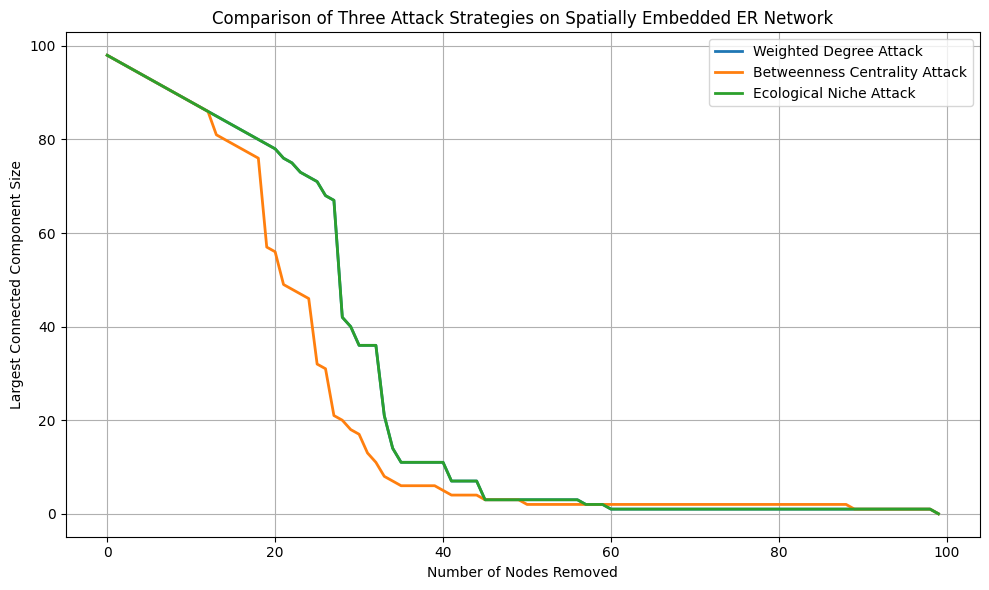

In [7]:
# 5. Main program
if __name__ == "__main__":
    G = generate_spatial_er_graph(n=100, p=0.05)

    print("Executing weighted degree attack...")
    wdeg_result = weighted_degree_attack(G)

    print("Executing betweenness centrality attack...")
    bc_result = betweenness_attack(G)

    print("Executing ecological niche index attack...")
    niche_result = ecological_niche_attack(G)

    # 6. Plot comparison
    plt.figure(figsize=(10, 6))
    plt.plot(wdeg_result, label="Weighted Degree Attack", linewidth=2)
    plt.plot(bc_result, label="Betweenness Centrality Attack", linewidth=2)
    plt.plot(niche_result, label="Ecological Niche Attack", linewidth=2)
    plt.xlabel("Number of Nodes Removed")
    plt.ylabel("Largest Connected Component Size")
    plt.title("Comparison of Three Attack Strategies on Spatially Embedded ER Network")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## 空间嵌入WS网络的三种攻击对比

In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

In [4]:
# 1. Generate spatially embedded WS network
def generate_spatial_ws_graph(n, k, p, space_size=100):
    G = nx.watts_strogatz_graph(n=n, k=k, p=p)
    pos = {i: np.random.rand(2) * space_size for i in G.nodes()}
    nx.set_node_attributes(G, pos, "pos")
    for u, v in G.edges():
        dist = np.linalg.norm(pos[u] - pos[v])
        G[u][v]['weight'] = dist
    return G

In [5]:
# 2. Weighted degree attack
def weighted_degree_attack(G):
    G = deepcopy(G)
    result = []
    while G.number_of_nodes() > 0:
        wdeg = {v: sum(data['weight'] for _, _, data in G.edges(v, data=True)) for v in G.nodes()}
        target = max(wdeg, key=wdeg.get)
        G.remove_node(target)
        giant = len(max(nx.connected_components(G), key=len)) if G.number_of_nodes() > 0 else 0
        result.append(giant)
    return result

In [6]:
# 3. Betweenness centrality attack
def betweenness_attack(G):
    G = deepcopy(G)
    result = []
    while G.number_of_nodes() > 0:
        bc = nx.betweenness_centrality(G, weight='weight')
        target = max(bc, key=bc.get)
        G.remove_node(target)
        giant = len(max(nx.connected_components(G), key=len)) if G.number_of_nodes() > 0 else 0
        result.append(giant)
    return result

In [10]:
# 4. Ecological niche attack
def ecological_niche_index(G, alpha=0.2, beta=0.6, gamma=0.2): # 默认参数
    deg = {v: sum(data['weight'] for _, _, data in G.edges(v, data=True)) for v in G.nodes()}
    betw = nx.betweenness_centrality(G, weight='weight')
    scores = {}
    for v in G.nodes():
        neigh = set(G.neighbors(v))
        overlap = []
        for u in neigh:
            nu = set(G.neighbors(u))
            union = neigh | nu
            inter = neigh & nu
            if len(union) > 0:
                overlap.append(len(inter) / len(union))
        uniqueness = 1 - np.mean(overlap) if overlap else 1
        scores[v] = alpha * deg[v] + beta * betw[v] + gamma * uniqueness
    return scores

def ecological_niche_attack(G):
    G = deepcopy(G)
    result = []
    while G.number_of_nodes() > 0:
        scores = ecological_niche_index(G)
        target = max(scores, key=scores.get)
        G.remove_node(target)
        giant = len(max(nx.connected_components(G), key=len)) if G.number_of_nodes() > 0 else 0
        result.append(giant)
    return result


Executing weighted degree attack...
Executing betweenness centrality attack...
Executing ecological niche index attack...


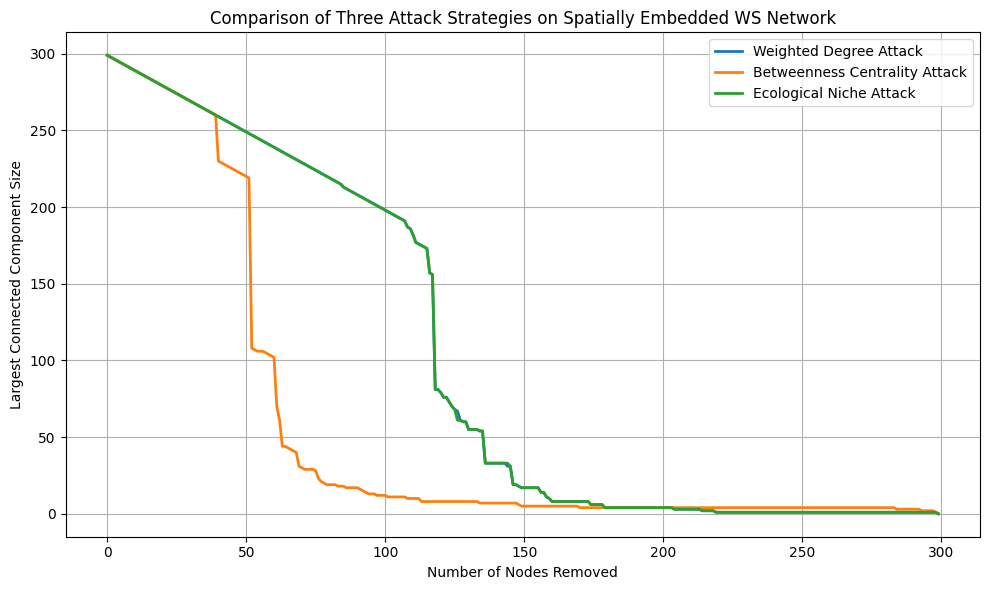

In [11]:
# 5. Main program
if __name__ == "__main__":
    G = generate_spatial_ws_graph(n=300, k=6, p=0.1)  # WS network with spatial weights

    print("Executing weighted degree attack...")
    wdeg_result = weighted_degree_attack(G)

    print("Executing betweenness centrality attack...")
    bc_result = betweenness_attack(G)

    print("Executing ecological niche index attack...")
    niche_result = ecological_niche_attack(G)

    # 6. Plot comparison
    plt.figure(figsize=(10, 6))
    plt.plot(wdeg_result, label="Weighted Degree Attack", linewidth=2)
    plt.plot(bc_result, label="Betweenness Centrality Attack", linewidth=2)
    plt.plot(niche_result, label="Ecological Niche Attack", linewidth=2)
    plt.xlabel("Number of Nodes Removed")
    plt.ylabel("Largest Connected Component Size")
    plt.title("Comparison of Three Attack Strategies on Spatially Embedded WS Network")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## 空间嵌入BA网络的三种攻击对比

In [21]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy


In [22]:
# 1. Generate spatially embedded BA network
def generate_spatial_ba_graph(n, m, space_size=100):
    G = nx.barabasi_albert_graph(n=n, m=m)
    pos = {i: np.random.rand(2) * space_size for i in G.nodes()}
    nx.set_node_attributes(G, pos, "pos")
    for u, v in G.edges():
        dist = np.linalg.norm(pos[u] - pos[v])
        G[u][v]['weight'] = dist
    return G

In [23]:
# 2. Weighted degree attack
def weighted_degree_attack(G):
    G = deepcopy(G)
    result = []
    while G.number_of_nodes() > 0:
        wdeg = {v: sum(data['weight'] for _, _, data in G.edges(v, data=True)) for v in G.nodes()}
        target = max(wdeg, key=wdeg.get)
        G.remove_node(target)
        giant = len(max(nx.connected_components(G), key=len)) if G.number_of_nodes() > 0 else 0
        result.append(giant)
    return result

In [24]:
# 3. Betweenness centrality attack
def betweenness_attack(G):
    G = deepcopy(G)
    result = []
    while G.number_of_nodes() > 0:
        bc = nx.betweenness_centrality(G, weight='weight')
        target = max(bc, key=bc.get)
        G.remove_node(target)
        giant = len(max(nx.connected_components(G), key=len)) if G.number_of_nodes() > 0 else 0
        result.append(giant)
    return result

In [25]:
# 4. Ecological niche index attack
def ecological_niche_index(G, alpha=0.4, beta=0.4, gamma=0.2):
    deg = {v: sum(data['weight'] for _, _, data in G.edges(v, data=True)) for v in G.nodes()}
    betw = nx.betweenness_centrality(G, weight='weight')
    scores = {}
    for v in G.nodes():
        neigh = set(G.neighbors(v))
        overlap = []
        for u in neigh:
            nu = set(G.neighbors(u))
            union = neigh | nu
            inter = neigh & nu
            if len(union) > 0:
                overlap.append(len(inter) / len(union))
        uniqueness = 1 - np.mean(overlap) if overlap else 1
        scores[v] = alpha * deg[v] + beta * betw[v] + gamma * uniqueness
    return scores

def ecological_niche_attack(G):
    G = deepcopy(G)
    result = []
    while G.number_of_nodes() > 0:
        scores = ecological_niche_index(G)
        target = max(scores, key=scores.get)
        G.remove_node(target)
        giant = len(max(nx.connected_components(G), key=len)) if G.number_of_nodes() > 0 else 0
        result.append(giant)
    return result

Executing weighted degree attack...
Executing betweenness centrality attack...
Executing ecological niche index attack...


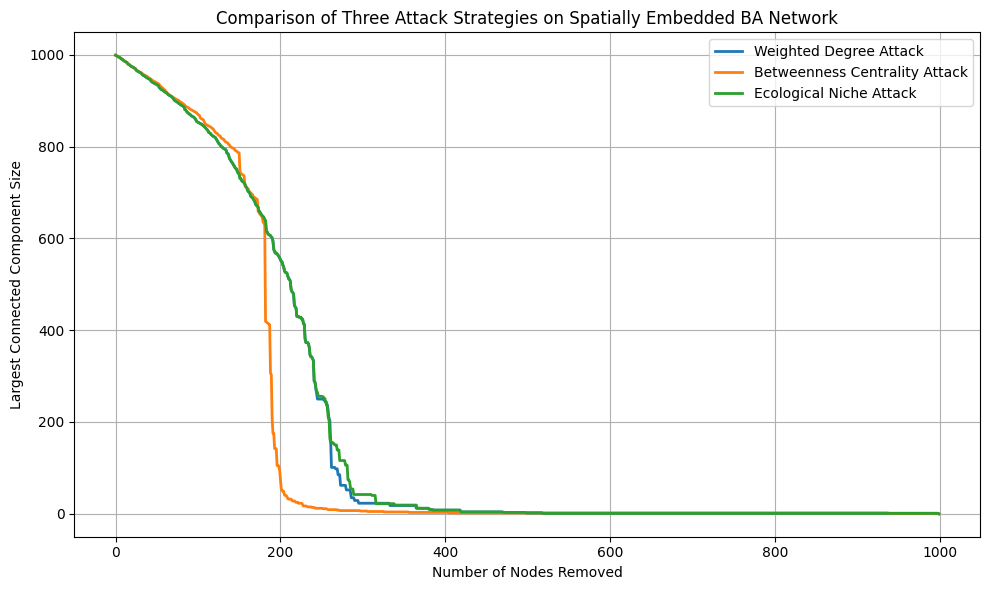

In [27]:
# 5. Main program
if __name__ == "__main__":
    G = generate_spatial_ba_graph(n=1000, m=3)  # BA network with spatial weights

    print("Executing weighted degree attack...")
    wdeg_result = weighted_degree_attack(G)

    print("Executing betweenness centrality attack...")
    bc_result = betweenness_attack(G)

    print("Executing ecological niche index attack...")
    niche_result = ecological_niche_attack(G)

    # 6. Plot comparison
    plt.figure(figsize=(10, 6))
    plt.plot(wdeg_result, label="Weighted Degree Attack", linewidth=2)
    plt.plot(bc_result, label="Betweenness Centrality Attack", linewidth=2)
    plt.plot(niche_result, label="Ecological Niche Attack", linewidth=2)
    plt.xlabel("Number of Nodes Removed")
    plt.ylabel("Largest Connected Component Size")
    plt.title("Comparison of Three Attack Strategies on Spatially Embedded BA Network")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()